# 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [988]:
import pandas as pd
import numpy as np
import os
import glob

#Importing Surprise Package

from surprise.model_selection import train_test_split

#import Matplot and Seaborn

import matplotlib.pyplot as plt
import seaborn as sns


#SVD from Surprise and KNNWithMeans

from surprise import SVD
from surprise import accuracy
from surprise import Prediction
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split


#Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

from collections import defaultdict

## Cross Validation Technique
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV

In [746]:
os.chdir('D://AIML STUDY MATERIAL//RecommendationSystem//Assignments//Dataset')

 # • Merge the provided CSVs into one data-frame.

In [747]:
extension ="csv"

all_filenames =[i for i in glob.glob('*.{}'.format(extension))]

In [748]:
all_filenames

['phone_user_review_file_1.csv',
 'phone_user_review_file_2.csv',
 'phone_user_review_file_3.csv',
 'phone_user_review_file_4.csv',
 'phone_user_review_file_5.csv',
 'phone_user_review_file_6.csv']

In [749]:
smart_phones_df = pd.concat([pd.read_csv(f,encoding='iso-8859-1') for f in all_filenames])

# • Check a few observations and shape of the data-frame.

In [750]:
print('There are ',smart_phones_df.shape[0],' rows and columns',smart_phones_df.shape[1])

There are  1415133  rows and columns 11


In [751]:
smart_phones_df.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [752]:
smart_phones_df.sample(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
304555,/cellphones/samsung-galaxy-s-iii/,7/3/2016,en,us,Amazon,amazon.com,10.0,10.0,i love this phone,sherman sparks,"Samsung Galaxy S3, Marble White 16GB (AT&T)"
36230,/cellphones/samsung-galaxy-s7-789999/,6/13/2016,nl,be,KIESKEURIG,kieskeurig.be,8.6,10.0,Heb nu de S7 een dag of 12 maar het is gewoon ...,mart,Samsung Galaxy S7 zwart / 32 GB
64114,/cellphones/samsung-galaxy-s7710-xcover-2/,10/9/2013,de,de,Amazon,amazon.de,10.0,10.0,Produkt hat seinen Erwartungen erf??hlt .Man k...,Rutschke,"Samsung S7710 Galaxy Xcover 2 Smartphone (10,2..."
43869,/cellphones/apple-iphone-6s/,2/8/2017,de,de,Otto.de,otto.de,10.0,10.0,Es ist schon was anderes ein iPhone zu haben. ...,einer Kundin,"Apple iPhone 6s 4,7"" 128 GB"
56721,/cellphones/nokia-n70/,11/11/2008,ru,ru,Yandex,market.yandex.ru,6.0,10.0,NaN,NaN,Nokia N70 Game Edition
224649,/cellphones/nokia-225/,11/14/2014,en,in,Amazon,amazon.in,8.0,10.0,Nice phone with big fonts. I bought it for my ...,Rahul,"Nokia 225 (Dual SIM, White)"
120801,/cellphones/nokia-e5/,9/21/2011,it,it,Ciao,ciao.it,8.0,10.0,A distanza di mesi dalla precoce scomparsa del...,STALIN_01,Nokia E5-00
95935,/cellphones/lg-thrive/,8/25/2013,en,us,Amazon,amazon.com,10.0,10.0,I gave the phone this rating because it is eve...,LiL,LG Thrive P506 Unlocked GSM Phone with Android...
172450,/cellphones/apple-iphone-3gs/,6/13/2010,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð ÑÐµÐ»Ð¾Ð¼ Ð°Ð¿Ð¿Ð°ÑÐ°Ñ Ð¼Ð½Ðµ Ð¿Ð¾Ð½ÑÐ°...,frolan,Apple iPhone 3GS 16Gb
307179,/cellphones/nokia-3600-slide/,7/11/2013,en,us,HandCellPhone,handcellphone.com,NaN,NaN,Ihave just bought one for Â£39.99,Marg,Nokia 3600 Slide


# • Round off scores to the nearest integers.

In [753]:
smart_phones_df['score'].value_counts()

10.0    656239
8.0     296018
2.0     128485
6.0     116616
4.0      72462
         ...  
0.4          2
4.9          1
1.5          1
8.9          1
6.1          1
Name: score, Length: 86, dtype: int64

<font color=darkblue>
    
# Observations:
   - From the above value counts we can see there are few scores with decimals, lets round off the decimals to its nearest integers.

In [754]:
smart_phones_df_rounded = smart_phones_df.round({'score': 0})

In [755]:
smart_phones_df_rounded.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


# Check for missing values. Impute the missing values if there is any.

In [756]:
if(smart_phones_df_rounded.isnull().any().sum()):
    print('There are few missing values in the dataset')
else:
    print('There are no missing values')

There are few missing values in the dataset


In [757]:
smart_phones_df_rounded.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

<font color=darkblue>
    
# Observations:
   - From the above, We can observe there are few missing values in the score,score_max,extract,author. Only Score and Score_max are float, Extract,author and product are object type.
   - Lets drop the object features such as extract,author and product, Which is tough to impute.

In [758]:
## Drop the null rows for Extract,Author and Product

smart_phones_df_rounded.dropna(subset=['extract', 'author','product'],inplace=True)

In [759]:
#Check the null values after dropping the rows Extract,Author and Product, Still there are 60499 rows with null/missing 
# values for score and 60499 rows with null/missing values for score_max

smart_phones_df_rounded.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        60499
score_max    60499
extract          0
author           0
product          0
dtype: int64

In [760]:
# Checking is there is any null for Score and Score_max
smart_phones_df_rounded[smart_phones_df_rounded['score'].isnull()]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
489,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,"Ð²ÑÐµ Ð½ÑÐ°Ð²Ð¸ÑÑÑ, Ð½Ðµ Ð¿Ð¾Ð»ÑÐ·Ð¾Ð²Ð°...",ÐÐ¼Ð¸ÑÑÐ¸Ð¹ Ð¡ÐµÑÐ³ÐµÐµÐ²,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
490,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,"Ð´Ð¾ÑÐ¾Ð³Ð¾Ð¹ Ð±ÑÐ´Ð¶ÐµÑÐ½Ð¸Ðº, Ð½Ðµ Ð´Ð»Ñ...",ÐÐ°Ð´ÐµÐ¶Ð´Ð°,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
491,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,2300 Ð¼Ð¸Ð»Ð»Ð¸Ð°Ð¼Ð¿ÐµÑ Ð² Ð±Ð°ÑÐ°ÑÐµÐµ â...,ÐÐ°ÑÐ²ÐµÐ¹ Ð.,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
492,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÑÐ´Ñ ÐºÑÐ°ÑÐ¾Ðº: Ð² ÑÐ¾Ð½Ð¸ ÑÐ¾ÑÐ²Ð¾Ñ...,ÐÐ°Ð²ÐµÐ» Ð,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
493,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÐ¾ÐºÑÐ¿Ð°Ð» ÑÐµÐ»ÐµÑÐ¾Ð½ ÑÐ¾Ð»ÑÐºÐ¾ Ð¸Ð...,ÐÐ³Ð¾ÑÑ,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
...,...,...,...,...,...,...,...,...,...,...,...
161209,/cellphones/motorola-m3788/,10/6/2014,tr,tr,Cepworld,cepworld.com,NaN,NaN,ilk kullandÄ±ÄÄ±m telefon 2000 yÄ±lÄ±nda almÄ...,BaÅkan,Motorola (391) M3788
161210,/cellphones/motorola-m3788/,3/11/2013,tr,tr,Cepworld,cepworld.com,NaN,NaN,bunun giriÅ kodlarÄ±nÄ± nasÄ±l acarÄ±m,sedat can,Motorola (391) M3788
161704,/cellphones/nokia-9000-communicator/,3/14/2015,tr,tr,Cepworld,cepworld.com,NaN,NaN,telefonun fiyati ne,mustafa can,Nokia (438) 9000 Communicator
163554,/cellphones/samsung-sgh-250/,3/11/2001,en,us,ReviewStream,reviewstream.com,NaN,NaN,I bougt mobile phone samsung sgh 250 on the 22...,razali,Samsung SGH 250


In [761]:
# As Score is the Very important attribute as median will make the model to be overfit, We can fill the null scores with 0

#smart_phones_df_rounded['score'] = smart_phones_df_rounded['score'].fillna(smart_phones_df_rounded['score'].median())

smart_phones_df_rounded['score'] = smart_phones_df_rounded['score'].fillna(0)

In [762]:
# Let the Score_max can be of median value, it won't impact much on the Predictions.

smart_phones_df_rounded['score_max'] = smart_phones_df_rounded['score_max'].fillna(smart_phones_df_rounded['score_max'].median())

In [763]:
## There are no null values for Score and Score_Max

smart_phones_df_rounded.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

# • Check for duplicate values and remove them if there is any.

In [764]:
if(smart_phones_df_rounded.duplicated().sum()):
        print('There are duplicate rows in the dataset')
else:
        print('There are no duplicate rows in the dataset')

There are duplicate rows in the dataset


In [765]:
# Shape of teh dataset before removing the Duplicates

print('There are ',smart_phones_df_rounded.shape[0],' rows and ',smart_phones_df_rounded.shape[1],' Columns')

There are  1336416  rows and  11  Columns


In [766]:
smart_phones_df_rounded.drop_duplicates(subset=['score', 'author','product'],keep='first',inplace=True)

In [767]:
if(smart_phones_df_rounded.duplicated().sum()):
        print('There are duplicate rows in the dataset')
else:
        print('There are no duplicate rows in the dataset')

There are no duplicate rows in the dataset


In [768]:
print('There are ',smart_phones_df_rounded.shape[0],' rows and ',smart_phones_df_rounded.shape[1],' Columns')

There are  1200233  rows and  11  Columns


# • Keep only 1000000 data samples. Use random state=612.

In [769]:
smart_phones_limited = smart_phones_df_rounded.sample(n=1000000,random_state=612)

In [770]:
print('There are now ',smart_phones_limited.shape[0],' rows and ',smart_phones_limited.shape[1],' Columns ')

There are now  1000000  rows and  11  Columns 


# • Drop irrelevant features. Keep features like Author, Product, and Score.

In [771]:
# Dropping the Phone Url and Date
smart_phones_limited.drop(columns=['phone_url','date'],axis=1,inplace=True)

In [772]:
print('There are now ',smart_phones_limited.shape[0],' rows and ',smart_phones_limited.shape[1],' Columns ')

There are now  1000000  rows and  9  Columns 


In [773]:
smart_phones_limited.head(10)

,lang,country,source,domain,score,score_max,extract,author,product
62172,en,in,Amazon,amazon.in,4.0,10.0,not a good phone you should buy higher version...,dheeraj,"Nokia Lumia 530 (Dual SIM, Grey)"
78308,en,us,Phone Arena,phonearena.com,8.0,10.0,"Very good smartphone, I like my samsung Gio bu...",Hyde,Samsung GALAXY Gio
57471,en,gb,Argos,argos.co.uk,10.0,10.0,Love the rose gold finish and long battery lif...,Bx,Sim Free Apple iPhone SE 64GB Mobile Phone - R...
369199,en,us,Amazon,amazon.com,4.0,10.0,I bought this phone 2 weeks ago and I find out...,ryan,Samsung Galaxy Grand Prime G531H/DS Internatio...
29280,de,de,Otto.de,otto.de,8.0,10.0,mein erstes Smartphone und es klappt prima. De...,Birgit R.,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di..."
104108,it,it,Amazon,amazon.it,10.0,10.0,eccellente .... telefono che soddisfa tutte le...,carmelo,"Samsung Galaxy Grand Neo Smartphone, Dual SIM,..."
140493,es,es,Amazon,amazon.es,10.0,10.0,Gran telÃ©fono con un hardware que estÃ¡ a la ...,antonio,Asus ZE520KL-1B011WW Zenfone 3 - Smartphone de...
73438,fr,fr,Amazon,amazon.fr,8.0,10.0,"tout est dans le titre : menus intuitifs, il c...",stoffy28,Samsung E1050 TÃ©lÃ©phone Portable Noir
223953,fr,fr,Amazon,amazon.fr,10.0,10.0,"Exellent portable, simple,fluide et tres bonne...",Glimath Nerio DINOSHAN NERIO,Samsung S5230 Star Smartphone Ecran tactile / ...
12321,es,ar,MercadoLibre,opinion.mercadolibre.com.ar,10.0,10.0,"Es un excelente celular, tiene todo lo q estab...",BETINA84,Sony Ericsson W300


# 2. Answer the following questions

# • Identify the most rated features.

In [774]:
most_rated_features = pd.DataFrame(smart_phones_limited.groupby('product')['score'].mean())

In [775]:
most_rated_features['rating_counts'] = pd.DataFrame(smart_phones_limited.groupby('product')['score'].count())  

In [776]:
most_rated_features.sort_values(by='rating_counts',ascending=False).head(20)

,score,rating_counts
product,,
"OnePlus 3 (Graphite, 64 GB)",8.834867,1847
"Lenovo Vibe K4 Note (White,16GB)",7.464368,1740
"Lenovo Vibe K4 Note (Black, 16GB)",7.389941,1531
Samsung Galaxy J3 (8GB),8.915789,1520
"OnePlus 3 (Soft Gold, 64 GB)",8.661755,1493
Nokia N95,8.488691,1459
Samsung Galaxy S7 edge 32GB (Verizon),9.380525,1448
Samsung Galaxy S7 edge 32GB (T-Mobile),9.453830,1397
Samsung Galaxy S6 zwart / 32 GB,9.008221,1338


<font color=darkblue>
    
# Observations:
   - From the above, We can say OnePlus 3 (Graphite, 64 GB) has been more rated than any other features by 1847 
     with the mean Average Score of  8.834867
   -  Above are the Top 20 most rated features of a mobile phone.

# • Identify the users with most number of reviews.

In [777]:
most_reviewed_users = pd.DataFrame(smart_phones_limited.groupby('author')['score'].mean())

In [778]:
most_reviewed_users['review_count'] = pd.DataFrame(smart_phones_limited.groupby('author')['score'].count())

In [779]:
most_reviewed_users.sort_values(by='review_count',ascending=False).head(10)

,score,review_count
author,,
Amazon Customer,6.716155,13983
Cliente Amazon,6.978447,5382
Client d'Amazon,6.642857,2268
Amazon Kunde,6.628272,1719
Anonymous,7.225936,1496
David,8.113788,747
Alex,7.943870,677
Marco,8.104730,592
Daniel,8.148084,574


<font color=darkblue>
    
# Observations:
   - From the above, We can say Amazon Customer has reviewed more number of products than any other users with the average score of 6.716155.
   -  Above are the Top 10 Users with more number of reviews.

# Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [780]:
counts = smart_phones_limited['product'].value_counts()

In [781]:
counts

OnePlus 3 (Graphite, 64 GB)                                                                                               1847
Lenovo Vibe K4 Note (White,16GB)                                                                                          1740
Lenovo Vibe K4 Note (Black, 16GB)                                                                                         1531
Samsung Galaxy J3 (8GB)                                                                                                   1520
OnePlus 3 (Soft Gold, 64 GB)                                                                                              1493
                                                                                                                          ... 
Microsoft A00024453 Lumia 640 XL Smartphone (Single SIM, 8GB 4G Netz, 14,5 cm (5,7 Zoll) HD Display) schwarz                 1
Huawei P9 Plus, LTE, Display 5.5'' FHD, 64 GB Memoria Interna, 4 GB RAM, Fotocamera 12 MP, Batteria 3400 mAh, O

In [782]:
product_ratings = smart_phones_limited[smart_phones_limited['product'].isin(counts[counts >= 100].index)]

In [783]:
product_ratings.shape

(338766, 9)

In [784]:
# From the Product which have more than 50 ratings, We can get the users Who have given more than 50 ratings.
user_counts = product_ratings['author'].value_counts()

In [785]:
user_counts

Amazon Customer           1732
Amazon Kunde               435
Cliente Amazon             431
Anonymous                  251
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ         202
                          ... 
SamsungJulz                  1
Charlie Ferton               1
GERCHA2005                   1
cwestervil                   1
Adriano Oliveira Kilka       1
Name: author, Length: 268759, dtype: int64

In [786]:
user_product_ratings = product_ratings[product_ratings['author'].isin(user_counts[user_counts >= 100].index)]

In [787]:
#Below is the final Shape of the Dataset

user_product_ratings.shape

(6495, 9)

# 3. Build a popularity based model and recommend top 5 mobile phones.

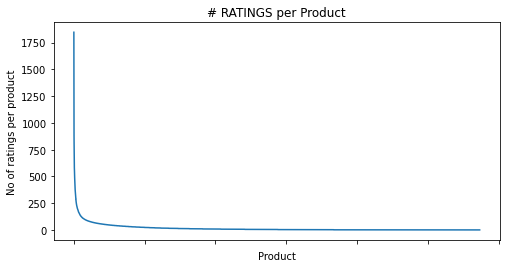

In [788]:
no_of_ratings_per_product = smart_phones_limited.groupby(by='product')['score'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [789]:
Popularity_Recommendations = pd.DataFrame(smart_phones_limited.groupby(by='product')['score'].mean())

In [790]:
Popularity_Recommendations.head()

,score
product,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mÃ©moire RAM 4 Go et 64 Go mÃ©moire...",8.000000
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.000000
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.538462


In [791]:
Popularity_Recommendations['rating_counts'] = pd.DataFrame(smart_phones_limited.groupby(by='product')['score'].count())

In [792]:
top_recommendation = Popularity_Recommendations.sort_values(by='rating_counts',ascending=False).head(5)
top_recommendation

,score,rating_counts
product,,
"OnePlus 3 (Graphite, 64 GB)",8.834867,1847
"Lenovo Vibe K4 Note (White,16GB)",7.464368,1740
"Lenovo Vibe K4 Note (Black, 16GB)",7.389941,1531
Samsung Galaxy J3 (8GB),8.915789,1520
"OnePlus 3 (Soft Gold, 64 GB)",8.661755,1493


In [793]:
top_recommendation = top_recommendation.reset_index()
top_recommendation

,product,score,rating_counts
0,"OnePlus 3 (Graphite, 64 GB)",8.834867,1847
1,"Lenovo Vibe K4 Note (White,16GB)",7.464368,1740
2,"Lenovo Vibe K4 Note (Black, 16GB)",7.389941,1531
3,Samsung Galaxy J3 (8GB),8.915789,1520
4,"OnePlus 3 (Soft Gold, 64 GB)",8.661755,1493


<AxesSubplot:xlabel='product'>

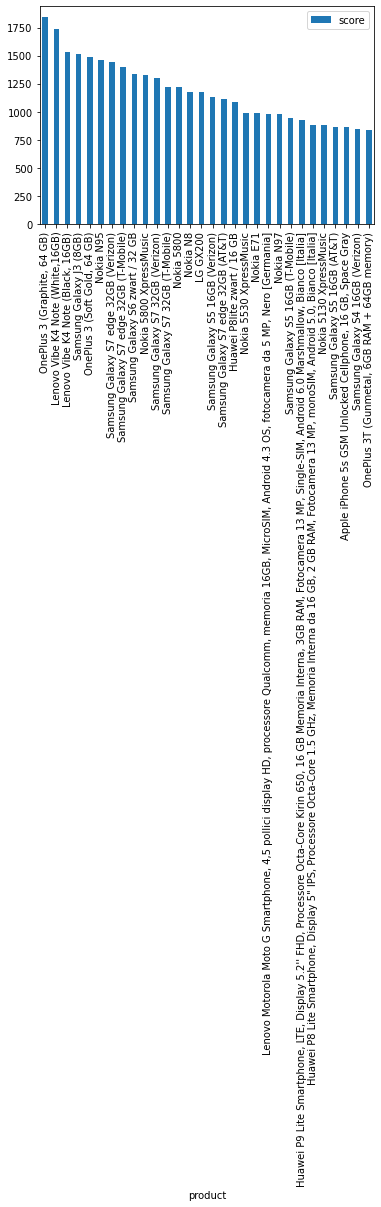

In [794]:
popular_products = pd.DataFrame(smart_phones_limited.groupby('product')['score'].count())
most_popular = popular_products.sort_values('score', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [795]:
# Use popularity based recommender model to make predictions

def recommendation(author):     
    user_recommendations = top_recommendation 
          
    #Add New_User column for which the recommendations are being generated 
    user_recommendations['New_User'] = author 
      
    #Bring New_User column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:3] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [796]:
## Few new User Searching for popular mobiles

newUsers = ["Red Mobiles","Mobile Giant","Alibaba","Virgin Mobiles"]
for i in newUsers:
    print("Here is the recommendation for the new user: %s\n" %(i))
    print(recommendation(i))    
    print("\n") 

Here is the recommendation for the new user: Red Mobiles

      New_User                            product     score  rating_counts
0  Red Mobiles        OnePlus 3 (Graphite, 64 GB)  8.834867           1847
1  Red Mobiles   Lenovo Vibe K4 Note (White,16GB)  7.464368           1740
2  Red Mobiles  Lenovo Vibe K4 Note (Black, 16GB)  7.389941           1531
3  Red Mobiles            Samsung Galaxy J3 (8GB)  8.915789           1520
4  Red Mobiles       OnePlus 3 (Soft Gold, 64 GB)  8.661755           1493


Here is the recommendation for the new user: Mobile Giant

       New_User                            product     score  rating_counts
0  Mobile Giant        OnePlus 3 (Graphite, 64 GB)  8.834867           1847
1  Mobile Giant   Lenovo Vibe K4 Note (White,16GB)  7.464368           1740
2  Mobile Giant  Lenovo Vibe K4 Note (Black, 16GB)  7.389941           1531
3  Mobile Giant            Samsung Galaxy J3 (8GB)  8.915789           1520
4  Mobile Giant       OnePlus 3 (Soft Gold, 64 GB) 

<font color=darkblue>
    
# Observations:
   - From the above Popularity based Model, the Maximum number of ratings is 1847 for OnePlus 3 (Graphite, 64 GB) with the Mean score of 8.834867.
   - Top 5 popular products are below.

|product |score |rating_counts|
|---|---|---|	
|OnePlus 3 (Graphite, 64 GB)  |8.834867           |1847|
|Lenovo Vibe K4 Note (White,16GB)  |7.464368          | 1740|
|Lenovo Vibe K4 Note (Black, 16GB)  |7.389941          | 1531|
|Samsung Galaxy J3 (8GB)  |8.915789           |1520|
|OnePlus 3 (Soft Gold, 64 GB)  |8.661755          | 1493|

   - Since this is a popularity-based recommender model, recommendations remain the same for all users.We recommend the products based on the popularity. It is not personalized to particular user

# 4 . Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [849]:
## Using SVD and using the dataframe user_product_ratings which contains product having 
# more than 50 ratings and users rated more than 50 ratings.

In [850]:
reader = Reader(rating_scale=(1, 10))

In [851]:
data = Dataset.load_from_df(user_product_ratings[['author','product','score']],reader)

In [852]:
type(data)

surprise.dataset.DatasetAutoFolds

In [853]:
type(data.df)

pandas.core.frame.DataFrame

In [854]:
data.df

,author,product,score
213139,Amazon Customer,Nokia 230 Dual Sim (Dark Silver),8.0
260325,Amazon Customer,Kazam Wileyfox Swift UK SIM-Free Smartphone wi...,10.0
19495,Mike,Samsung Galaxy S7 Edge goud / 32 GB,9.0
62633,Amazon Customer,LG G2 D800 GSM 4G LTE Unlocked Smartphone with...,4.0
88810,Amazon Kunde,"HTC Desire C Smartphone (8,9 cm (3,5 Zoll) HVG...",8.0
...,...,...,...
976,Anonymous,Samsung Galaxy S6 edge+ 64GB (AT&T),9.0
89347,Amazon Kunde,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1...",10.0
167448,Amazon Customer,"Microsoft Nokia C3-01 Touch and Type Handy (6,...",8.0
121997,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Samsung Galaxy Note5,10.0


In [890]:
train_set,test_set = train_test_split(data,test_size=0.30,random_state=10)

In [923]:
svd_model = SVD(n_epochs=50)
svd_model.fit(train_set)

In [924]:
svd_test_prediction = svd_model.test(test_set)

In [925]:
# Use user_based with KNNWithMeans Algorithm to use  user-based collaborative filtering

cf_UU_model =KNNWithMeans(k=50,sim_options={'name': 'pearson_baseline','user_based': True})

In [926]:
cf_UU_model.fit(train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [927]:
# Use user_based false to use item-based collaborative filtering in  KNNWithMeans

cf_II_model =KNNWithMeans(k=50,sim_options={'name': 'pearson_baseline','user_based': False})

In [928]:
cf_II_model.fit(train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


# 5. Evaluate the collaborative model. Print RMSE value.

In [954]:
##Function to evaluate precision and Recall at K

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    ##Return precision and recall at k metrics for each user

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [948]:
precisions, recalls = precision_recall_at_k(svd_test_prediction, k=5, threshold=4)

# Precision and recall can then be averaged over all users
    
print('Precision through SVD is :',sum(prec for prec in precisions.values()) / len(precisions))
print('Recall through SVD is :',sum(rec for rec in recalls.values()) / len(recalls))

Precision through SVD is : 0.8066666666666668
Recall through SVD is : 0.1044902087381944


In [1017]:
# Checking the accuracy of SVD Model.
print("SVD Model : Test Set")

accuracy.rmse(svd_test_prediction)


# Checking the accuracy of SVD Model.
print("SVD Model MAE: Test Set")

accuracy.mae(svd_test_prediction)

SVD Model : Test Set
RMSE: 3.6348
SVD Model MAE: Test Set
MAE:  2.9842


2.9842318511720665

In [931]:
# run the trained model against the testset for USER_USER CF

test_UU_pred = cf_UU_model.test(test_set)

In [951]:
precisions, recalls = precision_recall_at_k(test_UU_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
    
print('Precision through KNNWithMeans for UBCF is :',sum(prec for prec in precisions.values()) / len(precisions))
print('Recall through KNNWithMeans for UBCF is :',sum(rec for rec in recalls.values()) / len(recalls))

Precision through KNNWithMeans for UBCF is : 0.8333333333333336
Recall through KNNWithMeans for UBCF is : 0.1077006355171387


In [1018]:
# get RMSE for USER USER BASED MODEL
print("User-based Model : Test Set")
accuracy.rmse(test_UU_pred, verbose=True)

# get MAE for USER USER BASED MODEL
print("User-based Model: Test Set")

accuracy.mae(test_UU_pred)

User-based Model : Test Set
RMSE: 3.8219
User-based Model: Test Set
MAE:  3.1034


3.1034295759999866

In [934]:
# run the trained model against the testset for ITEM_ITEM CF

test_II_pred = cf_II_model.test(test_set)

In [953]:
precisions, recalls = precision_recall_at_k(test_II_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
    
print('Precision through KNNWithMeans for IBCF is :',sum(prec for prec in precisions.values()) / len(precisions))
print('Recall through KNNWithMeans for IBCF is :',sum(rec for rec in recalls.values()) / len(recalls))

Precision through KNNWithMeans for IBCF is : 0.8400000000000003
Recall through KNNWithMeans for IBCF is : 0.10764181981712419


In [1020]:
# get RMSE for ITEM ITEM BASED MODEL
print("Item-based Model : Test Set")
accuracy.rmse(test_II_pred, verbose=True)

# get MAE for ITEM ITEM BASED MODEL
print("Item-based Model : Test Set")

accuracy.mae(test_II_pred,verbose=True)

Item-based Model : Test Set
RMSE: 3.7226
Item-based Model : Test Set
MAE:  3.0543


3.0542667313253022

# 6. Predict score (average rating) for test users.

In [937]:
# get a prediction for specific users.
test_UU_pred

[Prediction(uid='Andrea', iid='Samsung Galaxy S III mini (I8190) - Smartphone libre Android (pantalla 4", cÃ¡mara 5 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), azul', r_ui=8.0, est=6.275899087493291, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Apple iPhone 5C 8GB Factory Unlocked GSM Cell Phone - Blue', r_ui=2.0, est=6.666666666666667, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='Ð\x95Ð²Ð³ÐµÐ½Ð¸Ð¹', iid='Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»Ñ\x8bÐ¹)', r_ui=10.0, est=4.508219144363592, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid='Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', iid='Sony Xperia L (Ð±ÐµÐ»Ñ\x8bÐ¹)', r_ui=9.0, est=8.896953513775944, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Ð\x94ÐµÐ½Ð¸Ñ\x81', iid='Sony Xperia SP (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', r_ui=10.0, est=1.469118527046005, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid='Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', iid='Samsung S5830 

In [938]:
UU_Prediction = pd.DataFrame(test_UU_pred)

In [939]:
UU_Prediction.head(10)

,uid,iid,r_ui,est,details
0,Andrea,Samsung Galaxy S III mini (I8190) - Smartphone...,8.0,6.275899,"{'actual_k': 2, 'was_impossible': False}"
1,Amazon Customer,Apple iPhone 5C 8GB Factory Unlocked GSM Cell ...,2.0,6.666667,"{'actual_k': 3, 'was_impossible': False}"
2,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»ÑÐ¹),10.0,4.508219,"{'actual_k': 12, 'was_impossible': False}"
3,ÐÐ»ÐµÐºÑÐµÐ¹,Sony Xperia L (Ð±ÐµÐ»ÑÐ¹),9.0,8.896954,"{'actual_k': 1, 'was_impossible': False}"
4,ÐÐµÐ½Ð¸Ñ,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),10.0,1.469119,"{'actual_k': 7, 'was_impossible': False}"
5,ÐÐ»ÐµÐºÑÐµÐ¹,Samsung S5830 Galaxy Ace,10.0,6.989871,"{'actual_k': 6, 'was_impossible': False}"
6,Michael,iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED,8.0,9.997281,"{'actual_k': 2, 'was_impossible': False}"
7,Cliente Amazon,"LG Nexus 5X Smartphone, Display Touch da 5,2"" ...",8.0,6.000000,"{'actual_k': 3, 'was_impossible': False}"
8,Anonymous,HTC TyTN II,8.0,7.081390,"{'was_impossible': True, 'reason': 'User and/o..."
9,Thomas,"Lenovo Vibe K4 Note (White,16GB)",8.0,7.736842,"{'actual_k': 0, 'was_impossible': False}"


In [983]:
# As per the Trending mobiles from Popularity based model,
# We are trying to predict the average ratings for top 5 trending mobiles 
# and top 5 reviewed users by using the USER USER CF Model
trending_mobiles = ["OnePlus 3 (Graphite, 64 GB)","Lenovo Vibe K4 Note (White,16GB)",
                    "Lenovo Vibe K4 Note (Black, 16GB)","Samsung Galaxy J3 (8GB)","OnePlus 3 (Soft Gold, 64 GB)"]
top_users = ["Amazon Customer","Cliente Amazon","Client d'Amazon","Amazon Kunde","Anonymous"]
predict = []
for uid in top_users:
    for iid in trending_mobiles:
        predict.append(cf_UU_model.predict(uid, iid, verbose=True))      

user: Amazon Customer item: OnePlus 3 (Graphite, 64 GB) r_ui = None   est = 6.00   {'actual_k': 4, 'was_impossible': False}
user: Amazon Customer item: Lenovo Vibe K4 Note (White,16GB) r_ui = None   est = 5.00   {'actual_k': 2, 'was_impossible': False}
user: Amazon Customer item: Lenovo Vibe K4 Note (Black, 16GB) r_ui = None   est = 3.00   {'actual_k': 2, 'was_impossible': False}
user: Amazon Customer item: Samsung Galaxy J3 (8GB) r_ui = None   est = 7.08   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: Amazon Customer item: OnePlus 3 (Soft Gold, 64 GB) r_ui = None   est = 5.50   {'actual_k': 4, 'was_impossible': False}
user: Cliente Amazon item: OnePlus 3 (Graphite, 64 GB) r_ui = None   est = 1.42   {'actual_k': 1, 'was_impossible': False}
user: Cliente Amazon item: Lenovo Vibe K4 Note (White,16GB) r_ui = None   est = 6.37   {'actual_k': 0, 'was_impossible': False}
user: Cliente Amazon item: Lenovo Vibe K4 Note (Black, 16GB) r_ui = None   est = 6.37   {'actua

In [974]:
pd.DataFrame(predict)

,uid,iid,r_ui,est,details
0,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",None,5.734681,{'was_impossible': False}
1,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)",None,4.919148,{'was_impossible': False}
2,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",None,3.192004,{'was_impossible': False}
3,Amazon Customer,Samsung Galaxy J3 (8GB),None,6.699061,{'was_impossible': False}
4,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",None,5.566093,{'was_impossible': False}
5,Cliente Amazon,"OnePlus 3 (Graphite, 64 GB)",None,5.375456,{'was_impossible': False}
6,Cliente Amazon,"Lenovo Vibe K4 Note (White,16GB)",None,5.665032,{'was_impossible': False}
7,Cliente Amazon,"Lenovo Vibe K4 Note (Black, 16GB)",None,5.964030,{'was_impossible': False}
8,Cliente Amazon,Samsung Galaxy J3 (8GB),None,6.677342,{'was_impossible': False}
9,Cliente Amazon,"OnePlus 3 (Soft Gold, 64 GB)",None,6.692872,{'was_impossible': False}


In [979]:
# get a prediction for specific Items.
test_II_pred

[Prediction(uid='Andrea', iid='Samsung Galaxy S III mini (I8190) - Smartphone libre Android (pantalla 4", cÃ¡mara 5 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), azul', r_ui=8.0, est=7.7743600798879156, details={'actual_k': 38, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Apple iPhone 5C 8GB Factory Unlocked GSM Cell Phone - Blue', r_ui=2.0, est=6.689313588655608, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Ð\x95Ð²Ð³ÐµÐ½Ð¸Ð¹', iid='Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»Ñ\x8bÐ¹)', r_ui=10.0, est=4.758870599199624, details={'actual_k': 36, 'was_impossible': False}),
 Prediction(uid='Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', iid='Sony Xperia L (Ð±ÐµÐ»Ñ\x8bÐ¹)', r_ui=9.0, est=8.553329852721502, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Ð\x94ÐµÐ½Ð¸Ñ\x81', iid='Sony Xperia SP (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)', r_ui=10.0, est=2.436451356354506, details={'actual_k': 27, 'was_impossible': False}),
 Prediction(uid='Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', iid='Samsung S

In [980]:
II_Prediction = pd.DataFrame(test_II_pred)

In [982]:
II_Prediction.head(10)

,uid,iid,r_ui,est,details
0,Andrea,Samsung Galaxy S III mini (I8190) - Smartphone...,8.0,7.774360,"{'actual_k': 38, 'was_impossible': False}"
1,Amazon Customer,Apple iPhone 5C 8GB Factory Unlocked GSM Cell ...,2.0,6.689314,"{'actual_k': 50, 'was_impossible': False}"
2,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Samsung Galaxy S4 mini Duos GT-I9192 (Ð±ÐµÐ»ÑÐ¹),10.0,4.758871,"{'actual_k': 36, 'was_impossible': False}"
3,ÐÐ»ÐµÐºÑÐµÐ¹,Sony Xperia L (Ð±ÐµÐ»ÑÐ¹),9.0,8.553330,"{'actual_k': 50, 'was_impossible': False}"
4,ÐÐµÐ½Ð¸Ñ,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),10.0,2.436451,"{'actual_k': 27, 'was_impossible': False}"
5,ÐÐ»ÐµÐºÑÐµÐ¹,Samsung S5830 Galaxy Ace,10.0,7.010483,"{'actual_k': 50, 'was_impossible': False}"
6,Michael,iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED,8.0,9.963089,"{'actual_k': 39, 'was_impossible': False}"
7,Cliente Amazon,"LG Nexus 5X Smartphone, Display Touch da 5,2"" ...",8.0,5.907387,"{'actual_k': 50, 'was_impossible': False}"
8,Anonymous,HTC TyTN II,8.0,7.081390,"{'was_impossible': True, 'reason': 'User and/o..."
9,Thomas,"Lenovo Vibe K4 Note (White,16GB)",8.0,5.928951,"{'actual_k': 13, 'was_impossible': False}"


In [985]:
# As per the Trending mobiles from Popularity based model,
# We are trying to predict the average ratings for top 5 trending mobiles 
# and top 5 reviewed users by using the ITEM ITEM based CF model
trending_mobiles = ["OnePlus 3 (Graphite, 64 GB)","Lenovo Vibe K4 Note (White,16GB)",
                    "Lenovo Vibe K4 Note (Black, 16GB)","Samsung Galaxy J3 (8GB)","OnePlus 3 (Soft Gold, 64 GB)"]
top_users = ["Amazon Customer","Cliente Amazon","Client d'Amazon","Amazon Kunde","Anonymous"]
itempredict = []
for uid in top_users:
    for iid in trending_mobiles:
        itempredict.append(cf_II_model.predict(uid, iid, verbose=True))      

user: Amazon Customer item: OnePlus 3 (Graphite, 64 GB) r_ui = None   est = 5.99   {'actual_k': 50, 'was_impossible': False}
user: Amazon Customer item: Lenovo Vibe K4 Note (White,16GB) r_ui = None   est = 4.52   {'actual_k': 50, 'was_impossible': False}
user: Amazon Customer item: Lenovo Vibe K4 Note (Black, 16GB) r_ui = None   est = 2.43   {'actual_k': 50, 'was_impossible': False}
user: Amazon Customer item: Samsung Galaxy J3 (8GB) r_ui = None   est = 7.08   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: Amazon Customer item: OnePlus 3 (Soft Gold, 64 GB) r_ui = None   est = 5.36   {'actual_k': 50, 'was_impossible': False}
user: Cliente Amazon item: OnePlus 3 (Graphite, 64 GB) r_ui = None   est = 5.09   {'actual_k': 34, 'was_impossible': False}
user: Cliente Amazon item: Lenovo Vibe K4 Note (White,16GB) r_ui = None   est = 3.47   {'actual_k': 33, 'was_impossible': False}
user: Cliente Amazon item: Lenovo Vibe K4 Note (Black, 16GB) r_ui = None   est = 2.47   {

In [986]:
pd.DataFrame(itempredict)

,uid,iid,r_ui,est,details
0,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",None,5.993704,"{'actual_k': 50, 'was_impossible': False}"
1,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)",None,4.524049,"{'actual_k': 50, 'was_impossible': False}"
2,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",None,2.431129,"{'actual_k': 50, 'was_impossible': False}"
3,Amazon Customer,Samsung Galaxy J3 (8GB),None,7.081390,"{'was_impossible': True, 'reason': 'User and/o..."
4,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",None,5.364164,"{'actual_k': 50, 'was_impossible': False}"
5,Cliente Amazon,"OnePlus 3 (Graphite, 64 GB)",None,5.088548,"{'actual_k': 34, 'was_impossible': False}"
6,Cliente Amazon,"Lenovo Vibe K4 Note (White,16GB)",None,3.470639,"{'actual_k': 33, 'was_impossible': False}"
7,Cliente Amazon,"Lenovo Vibe K4 Note (Black, 16GB)",None,2.470639,"{'actual_k': 33, 'was_impossible': False}"
8,Cliente Amazon,Samsung Galaxy J3 (8GB),None,7.081390,"{'was_impossible': True, 'reason': 'User and/o..."
9,Cliente Amazon,"OnePlus 3 (Soft Gold, 64 GB)",None,5.777182,"{'actual_k': 34, 'was_impossible': False}"


# 7. Report your findings and inferences.

<font color=darkblue>
    
# Observations:
   - RMSE looks to be more for SVD based model and KNNWithMeans Algorithimic model, Which makes the model to be overfit.
        - RMSE for SVD Model - RMSE: 3.6348
        - RMSE for UBCF Model - RMSE: 3.8219
        - RMSE fo IBCF model - RMSE: 3.7226
  - Precision (Out of all mobiles retrieved, how many are relevant) through SVD is : 0.806
  - Precision (Out of all mobiles retrieved, how many are relevant)through KNNWithMeans for IBCF is : 0.84
  - Precision (Out of all mobiles retrieved, how many are relevant)through KNNWithMeans for UBCF is : 0.83
  - From one of the above prediction we can see predicted ratings for top reviewed customers such as Amazon Customer as below 
       
|uid |iid |r_ui|est |
| --- |---|---|---|			
|Amazon Customer 	|OnePlus 3 (Graphite, 64 GB) 		|None 	|5.993704|		
|Amazon Customer 	|Lenovo Vibe K4 Note (White,16GB) 	|None 	|4.524049|	
|Amazon Customer 	|Lenovo Vibe K4 Note (Black, 16GB) 	|None 	|2.431129|	
|Amazon Customer 	|Samsung Galaxy J3 (8GB) 			|None 	|7.081390|			
|Amazon Customer 	|OnePlus 3 (Soft Gold, 64 GB) 		|None 	|5.364164|	
 
  - We can see these top rated mobiles from popularity based recommendations, Amazon customer doesn't rate any of them and the model has arrived with some estimated ratings.
  - Recall through SVD is : 0.104
  - Recall through KNNWithMeans for IBCF is : 0.107
  - Recall through KNNWithMeans for UBCF is : 0.107
  
  - Mean Abosulte Errors of all the recommendation models also looks to be overfit.
      - MAE for SVD model  - 2.9842 
      - MAE for UBCF model - 3.1034
      - MAE for IBCF model - 3.0543

# 8. Try and recommend top 5 products for test users.

In [836]:
User_Prediction = pd.DataFrame(test_UU_pred)

In [837]:
User_Prediction.sample(20)

,uid,iid,r_ui,est,details
944,Ð¡ÐµÑÐ³ÐµÐ¹,Samsung N7100 Galaxy Note II 16GB (ÑÐµÑÑÐ¹),10.0,4.673356,"{'actual_k': 10, 'was_impossible': False}"
574,ÐÐ»ÐµÐºÑÐµÐ¹,Sony Xperia SP (ÑÐµÑÐ½ÑÐ¹),10.0,7.008403,"{'actual_k': 11, 'was_impossible': False}"
1070,Marco,"Meizu M2 Note Smartphone, 5.5"" Full HD, 4G, 13...",10.0,10.000000,"{'actual_k': 2, 'was_impossible': False}"
859,Amazon Customer,"Samsung Galaxy S6, Black Sapphire 32GB (Verizo...",10.0,4.000000,"{'actual_k': 3, 'was_impossible': False}"
1217,Cliente Amazon,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",4.0,4.997917,"{'actual_k': 3, 'was_impossible': False}"
1109,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ,Sony Xperia L (ÑÐµÑÐ½ÑÐ¹),8.0,8.490892,"{'actual_k': 3, 'was_impossible': False}"
834,Cliente Amazon,"Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM...",8.0,6.000000,"{'actual_k': 3, 'was_impossible': False}"
931,Amazon Customer,"Samsung Galaxy Note 4, Charcoal Black 32GB (Ve...",8.0,5.500000,"{'actual_k': 4, 'was_impossible': False}"
788,Amazon Customer,"Motorola Moto E 2nd Generation (3G, White)",10.0,6.000000,"{'actual_k': 1, 'was_impossible': False}"
254,Chris,"Lenovo Moto X Play Smartphone (13,9 cm (5,5 Zo...",4.0,10.000000,"{'actual_k': 2, 'was_impossible': False}"


In [838]:
## Recommendation Based on USER

def userRecommendation(userName,n):
        recommend = User_Prediction[User_Prediction['uid']== userName][['uid','iid','est']].sort_values(by = 'est',ascending= False).head(n)
        return recommend

In [840]:
# Few users for User Based Recommendation

users =['Amazon Customer','Daniel','Christian','Alex','Antonio']

for user in users:
    print("Below are few recommendations for ",user,"\n")
    userRecommendations = userRecommendation(user,5) 
    
    for i in range(len(np.array(userRecommendations))):
            print('Author - ',np.array(userRecommendations)[i][0],' can try other mobiles like ',np.array(userRecommendations)[i][1],' which has the estimated Rating as -',np.array(userRecommendations)[i][2],"\n")
            
    print("End of recommendations for users",user,"\n")
        

Below are few recommendations for  Amazon Customer 

Author -  Amazon Customer  can try other mobiles like  Apple iPhone 5S Gold 64GB SIM-Free Smartphone (Zertifiziert und GeneralÃ¼berholt)  which has the estimated Rating as - 10.0 

Author -  Amazon Customer  can try other mobiles like  Microsoft Nokia 6131 black Handy  which has the estimated Rating as - 10.0 

Author -  Amazon Customer  can try other mobiles like  Samsung âSamsung Galaxy A3 Smartphone (12 cm (4,71 Zoll) HD Super AMOLED Touch-Display, 16 GB, Android 5.1) pink-gold  which has the estimated Rating as - 10.0 

Author -  Amazon Customer  can try other mobiles like  Nokia Lumia 521 T-Mobile GSM Windows 8 4G Noncontract Smartphone - White  which has the estimated Rating as - 10.0 

Author -  Amazon Customer  can try other mobiles like  BLU Studio 5.0 C HD Quad Core - Unlocked Cell Phone - (White)  which has the estimated Rating as - 10.0 

End of recommendations for users Amazon Customer 

Below are few recommendations f

In [880]:
 ## Recommendation Based on Items

Item_Prediction = pd.DataFrame(test_II_pred)

In [881]:
Item_Prediction.head(10)

,uid,iid,r_ui,est,details
0,Amazon Customer,HTC EVO Shift 4G Android Smartphone Blue - Sprint,10.0,3.408145,"{'actual_k': 50, 'was_impossible': False}"
1,Amazon Customer,"Microsoft Nokia 108 Dual-SIM Handy (4,5 cm (1,...",10.0,8.348521,"{'actual_k': 50, 'was_impossible': False}"
2,Client d'Amazon,LG Nexus 5X - Smartphone libre Android (pantal...,8.0,8.176251,"{'actual_k': 20, 'was_impossible': False}"
3,Thomas,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1...",8.0,7.636277,"{'actual_k': 22, 'was_impossible': False}"
4,Amazon Customer,"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",6.0,5.913261,"{'actual_k': 50, 'was_impossible': False}"
5,Christian,HTC TyTN II,4.0,8.000000,"{'actual_k': 0, 'was_impossible': False}"
6,Amazon Customer,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl...",6.0,5.148552,"{'actual_k': 50, 'was_impossible': False}"
7,ÐÐ»ÐµÐºÑÐµÐ¹,Apple iPhone 3GS 32Gb,8.0,8.315057,"{'actual_k': 12, 'was_impossible': False}"
8,Amazon Customer,Huawei Honor 8 Unlocked Smartphone 32 GB Dual ...,6.0,8.634014,"{'actual_k': 50, 'was_impossible': False}"
9,David,"Huawei Ascend Mate 7 Smartphone (6 Zoll (15,2 ...",10.0,8.610974,"{'actual_k': 50, 'was_impossible': False}"


In [883]:
## Recommendation Based on Items

def itemRecommendation(userName,n=5):
        iRecommend = Item_Prediction[Item_Prediction['uid']== userName][['uid','iid','est']].sort_values(by = 'est',ascending= False).head(n)
        return iRecommend

In [887]:
#users =["Thomas","Christian","David"]

users =['Amazon Customer','Daniel','Christian','Alex','Antonio']



for user in users:
    print("Below are few recommendations based on Items for ",user,"\n")
    itemRecommendations = itemRecommendation(user,5)
        
    for i in range(len(np.array(itemRecommendations))):
            print('Author - ',np.array(itemRecommendations)[i][0],' can try other mobiles like ',np.array(itemRecommendations)[i][1],' which has the estimated Rating as -',np.array(itemRecommendations)[i][2],"/n")
            
    print("End of Item based recommendations for ",user,"\n")
         

Below are few recommendations based on Items for  Amazon Customer 

Author -  Amazon Customer  can try other mobiles like  Samsung Galaxy A3  which has the estimated Rating as - 10.0 /n
Author -  Amazon Customer  can try other mobiles like  BLU Studio 5.0 C HD Quad Core - Unlocked Cell Phone - (White)  which has the estimated Rating as - 10.0 /n
Author -  Amazon Customer  can try other mobiles like  Nokia Lumia 521 T-Mobile GSM Windows 8 4G Noncontract Smartphone - White  which has the estimated Rating as - 10.0 /n
Author -  Amazon Customer  can try other mobiles like  Lenovo A6000 (White, 8GB)  which has the estimated Rating as - 10.0 /n
Author -  Amazon Customer  can try other mobiles like  Lenovo A6000 (White, 8GB)  which has the estimated Rating as - 10.0 /n
End of Item based recommendations for  Amazon Customer 

Below are few recommendations based on Items for  Daniel 

Author -  Daniel  can try other mobiles like  SPIGEN Neo Hybrid Galaxy S6 Edge Case with Flexible Inner TPU and

# 10. Try cross validation techniques to get better results.

In [1012]:
# using basic Kfold Cross Validation techniques
# using the same user_product_ratings Dataset which has products rated more than 50 times and 
# users reviewed more than 50 times

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    
    # Compute and print  Mean Absolute Error
    accuracy.mae(predictions, verbose=True)

RMSE: 3.4993
MAE:  2.8584
RMSE: 3.5472
MAE:  2.9480
RMSE: 3.4012
MAE:  2.8180


In [1013]:
# using basic Kfold Cross Validation techniques
# using the same user_product_ratings Dataset which has products rated more than 50 times and 
# users reviewed more than 50 times
# Algo used in KNNWithMeans for IBCF

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo_KNN = KNNWithMeans(k=50,sim_options={'name': 'pearson_baseline','user_based': False})

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo_KNN.fit(trainset)
    predictions = algo_KNN.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    
    # Compute and print  Mean Absolute Error
    accuracy.mae(predictions, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.7665
MAE:  3.1062
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.7701
MAE:  3.0817
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.7267
MAE:  3.0672


In [1011]:
# Using Grid Search CV techniques on SVD model

# passing the learning rate from 0.002 to 0.005 and regularization from 0.4 to 0.6
param_grid = {'n_epochs': [5, 50], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)

gs.fit(data)

# best RMSE score
print('Best RMSE Score:',gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print('Best RMSE params:',gs.best_params['rmse'])

# best mae score
print('Best MAE Score:',gs.best_score['mae'])

# combination of parameters that gave the best mae score
print('Best MAE Params:',gs.best_params['mae'])

Best RMSE Score: 2.952957089483796
Best RMSE params: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.6}
Best MAE Score: 2.495876658352398
Best MAE Params: {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}


In [1023]:
# Using Grid Search CV techniques on UBCF model

param_grid = {'k': [5,50],
              'sim_options': {'name': ['pearson_baseline','msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse','mae'], cv=3)

gs.fit(data)

# best RMSE score
print('Best RMSE Score:',gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print('Best RMSE Params:',gs.best_params['rmse'])

# best mae score
print('Best MAE Score:',gs.best_score['mae'])

# combination of parameters that gave the best mae score
print('Best MAE Params:',gs.best_params['mae'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

In [1024]:
param_grid = {'k': [5,50],
              'sim_options': {'name': ['pearson_baseline','msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [True]}
              }
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse','mae'], cv=3)

gs.fit(data)

# best RMSE score
print('Best RMSE Score:',gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print('Best RMSE Params:',gs.best_params['rmse'])

# best mae score
print('Best MAE Score:',gs.best_score['mae'])

# combination of parameters that gave the best mae score
print('Best MAE Params:',gs.best_params['mae'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

<font color=darkblue> 

# Observations:
   - After using Cross validations through Grid Search CV we have reduced the RMSE and MAE scores. Please see below
   
   - Before Cross Validation:
        - RMSE for SVD Model - RMSE: 3.6348
        - MAE for SVD model  - 2.9842 
        - RMSE for UBCF Model - RMSE: 3.8219
        - MAE for UBCF model - 3.1034
        - RMSE fo IBCF model - RMSE: 3.7226
        - MAE for IBCF model - 3.0543
   - After Cross Validation:
        - Best RMSE Score for SVD MODEL : 2.952957089483796
        - Best RMSE params for SVD MODEL : {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.6}
        - Best MAE Score for SVD MODEL: 2.495876658352398
        - Best MAE Params for SVD MODEL: {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}
        - Best RMSE Score for UBCF Model: 3.4380444518067965
        - Best RMSE Params for UBCF Model: {'k': 50, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}
        - Best MAE Score for UBCF Model: 2.821898971323997
        - Best MAE Params for UBCF Model: {'k': 50, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}       
        - Best RMSE Score for IBCF Model: 3.410388700373003
        - Best RMSE Params for IBCF Model: {'k': 50, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': True}}
        - Best MAE Score for IBCF Model: 2.787618596842593
        - Best MAE Params for IBCF Model: {'k': 50, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': True}}
   - Form the above we can see the RMSE and MAE are getting reduced after cross validation.

# 11. In what business scenario you should use popularity based Recommendation Systems ?

<font color=darkblue> 
    
 - As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.
 
 - From the above Popularity based recommendation models for Mobiles, for every new users sign in we are getting the below suggestions as common on popular basis.
 
|product |score |rating_counts|
|---|---|---|	
|OnePlus 3 (Graphite, 64 GB) 		|8.846446 	|1843|
|Lenovo Vibe K4 Note (White,16GB) 	|7.406770 	|1743|
|Lenovo Vibe K4 Note (Black, 16GB) 	|7.407311 	|1532|
|Samsung Galaxy J3 (8GB) 			|8.910773 	|1513|
|OnePlus 3 (Soft Gold, 64 GB) 		|8.652000 	|1500|

- Best addresses the Cold start and from Day-1 of the website we can have recommendation for our users.

# 12. In what business scenario you should use CF based Recommendation Systems ?

 <font color=darkblue> 

 - In Collaborative Filtering, we tend to find similar users and recommend what similar users like. In this type of recommendation system, we don’t use the features of the item to recommend it, rather we classify the users into the clusters of similar types, and recommend each user according to the preference of its cluster.

- When you have more number of customers than the Items, We can go with the CF based Recommendations.     

- From the above CF based recommendations we can see the Amazon Customer has got recommendation based on his personalization.
     - Below are few recommendations for  Amazon Customer 

          - Author -  Amazon Customer  can try other mobiles like  <b> Apple iPhone 5S Gold 64GB SIM-Free Smartphone (Zertifiziert und GeneralÃ¼berholt) </b> which has the estimated Rating as - <b> 10.0 </b>

          - Author -  Amazon Customer  can try other mobiles like <b> Microsoft Nokia 6131 black Handy </b>  which has the estimated Rating as -<b> 10.0 </b>

          - Author -  Amazon Customer  can try other mobiles like  <b> Samsung âSamsung Galaxy A3 Smartphone (12 cm (4,71 Zoll) HD Super AMOLED Touch-Display, 16 GB, Android 5.1) pink-gold  </b> which has the estimated Rating as - <b> 10.0 </b>

          - Author -  Amazon Customer  can try other mobiles like  <b> Nokia Lumia 521 T-Mobile GSM Windows 8 4G Noncontract Smartphone - White </b> which has the estimated Rating as - <b> 10.0 </b>

          - Author -  Amazon Customer  can try other mobiles like  <b> BLU Studio 5.0 C HD Quad Core - Unlocked Cell Phone - (White) </b> which has the estimated Rating as - <b> 10.0 </b>

    - End of recommendations for users Amazon Customer 


# 13. What other possible methods can you think of which can further improve the recommendation for different users ?

 <font color=darkblue> 

- Since we have extract the authors comments for every mobile phones, We can use Content based recommendations which will avoid cold start and sparsity problems. We can able to recommend users of their uniqness.
- By combining the Content based recommendations with the above collabarative filtering and Popularity based recommendations we can build a Hybrid recommendation systems,we can address grey Sheep problems as well.
- Market Based Recommendations, that the user buying a mobile will buy other products like powerbank,Tempared Glasses etc.
- As We have a large volume of mobile and purchase history dataset, We can use Model Based Collaborative filtering to recommend larger number of mobiles to larger number of users.